# Projeto Final
## Análise de Texto de Fontes Desestruturadas e Web.

#### Integrantes
- Manuel Castanares
- Rafael Malcervelli 

### Objetivo

O projeto envolverá o uso das técnicas aprendidas em aula para conduzir, com autonomia, a criação de uma prova de conceito envolvendo a extração de dados de fontes desestruturadas e sua posterior análise.

### Introdução

No mercado de PC gamers, a escolha de componentes é uma decisão crítica que pode afetar significativamente o desempenho e a satisfação do usuário final. Dada a constante flutuação dos preços e a vasta gama de produtos disponíveis, consumidores e montadores de PCs enfrentam o desafio de identificar as melhores opções de compra. Este projeto propõe a utilização de técnicas de web scraping e análise de texto para extrair e analisar dados de múltiplos marketplaces, proporcionando uma ferramenta útil para a comparação de preços, disponibilidade de estoque e qualidade percebida dos componentes.

<p align=center>
    <img src=" ./imgs/pc_gamer_1.jpg" alt="PC GAMER" class="bg-primary mb-1" width="500px">
</p>

### Problema

A principal problemática abordada neste projeto é a dificuldade em obter uma visão clara e atualizada das melhores opções de compra para componentes de PCs gamers devido à volatilidade dos preços e à diversidade de produtos. Esta situação leva a decisões de compra que nem sempre são ótimas em termos de custo-benefício. Portanto, a necessidade de uma solução que agilize e refine o processo de escolha se faz essencial para consumidores e profissionais da área.

A situacao-problema que propomos aqui é a seguinte:<br><br>
Um jovem gostaria de montar um PC gamer que consiga rodar com facilidade os jogos atuais (gráfico avancados, demandando processamento de video) e jogos competitivos. Para isso, esse jovem ja tem em mente a maquina que gostaria de montar com todos os seus componentes e explicacoes dos mesmos, que seguem:

- Placa-mae: O 'coração' do computador, conecta todos os componentes, permitindo que eles se comuniquem. A escolha da placa-mãe influencia diretamente quais processadores e tipos de memória serão compatíveis. -> Placa escolhida para análise (**Asus TUF GAMING Z690-PLUS D4 ATX LGA 1700**). <br><br>
- CPU (Processador): O 'cérebro' do PC, crucial para o processamento de todas as tarefas. O desempenho do processador afeta diretamente a capacidade do sistema em executar jogos complexos sem travamentos. -> CPU escolhida para análise (**Intel Core i7 12700K 3.6 GHz 12-Core**).<br><br>
- GPU (Placa de vídeo): Fundamental para renderizar gráficos avançados em tempo real, a escolha da placa de vídeo é crucial para a experiência visual em jogos. -> GPU escolhida para análise (**Gigabyte GeForce RTX 4060 8 GB Gaming**).<br><br>
- Memória RAM: Responsável por armazenar os dados temporários do sistema, uma quantidade suficiente de RAM é vital para garantir uma operação suave e eficiente durante jogos intensivos. -> Memória escolhida para análise (**Kingston HyperX Fury Black Series (Preto) 8 GB (1x8 GB) DDR4-2666**).<br><br>
- Armazenamento (SSD): Discos de estado sólido (SSD) proporcionam tempos de carregamento mais rápidos para sistemas operacionais e jogos quando comparados aos discos rígidos tradicionais (HDD). -> SSD escolhido para análise (**SanDisk SSD Plus 1 TB 2.5"**).<br><br>
- Fonte de Alimentação: Supre a energia necessária para todos os componentes. Uma fonte de qualidade e com potência adequada é essencial para a estabilidade e longevidade do sistema. -> Fonte escolhida para análise (**Corsair CV550 550 W Certificado 80+ Bronze ATX**).<br><br>
- Fans (Ventoinhas): Cruciais para manter uma temperatura operacional adequada dentro do gabinete, evitando o superaquecimento dos componentes. -> Fan escolhido para análise (**Cooler Master Masterfan Mf120 Halo RGB**).<br><br>
- Cooler para CPU: Específico para o resfriamento do processador, é vital para manter o desempenho sem riscos de superaquecimento, especialmente em sessões prolongadas de jogos. -> Cooler escolhido para análise (**Deepcool AG400 BK**).<br><br>
- Gabinete: Estrutura do PC que irá segurar todas as pecas nos seus devidos lugares. Além da questao estetica, é sempre bom visar por gabinetes que apresentam um bom fluxo de ar dentro deles, permitindo uma maior circulacao e consequentemente, uma diminuicao na temperatura das pecas. -> Gabinete escolhido para análise (** **).

<p align=center>
    <img src=" ./imgs/pc_gamer_2.jpg" alt="PC GAMER 2" class="bg-primary mb-1" width="500px">
</p>

### Extração de dados

Para iniciar a extração, iremos considerar o site Kabum, renomado mercado de peças de computador e que apresenta tais produtos para que possamos analisá-los.

##### KABUM

In [49]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import json

data = []

def get_most_popular_components(url, component_type, class_name):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        component_elements = soup.find_all('span', class_=class_name)
        components = [component.get_text(strip=True) for component in component_elements]
        return components[:10]
    else:
        print(f"Failed to retrieve {component_type} list")
        return []

def get_product_price(product_url):
    response = requests.get(product_url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        price_element = soup.find('h4', class_='sc-5492faee-2 ipHrwP finalPrice')
        if price_element:
            price_text = price_element.get_text(strip=True)
            return price_text.replace('R$', '').replace('.', '').replace(',', '.').strip()
        else:
            return "0"
    else:
        return "0"

def search_and_append_data(components, component_type):
    for component_name in components:
        search_query = component_name.replace(',', '').replace(' ', '-').replace('ã', '%C3%A3')
        search_url = f"https://www.kabum.com.br/busca/{search_query}"
        response = requests.get(search_url, stream=True)
        response.encoding = 'utf-8'
        soup = BeautifulSoup(response.text, 'html.parser')
        product_element = soup.find('a', class_='sc-9d1f1537-10 kueyFw productLink')
        if product_element:
            product_url = 'https://www.kabum.com.br' + product_element['href']
            product_price = get_product_price(product_url)
            if product_price != "0":
                data.append([component_name, component_type, float(product_price)])

components_info = [
    ("https://www.kabum.com.br/hardware/placas-mae", "motherboard", "sc-d79c9c3f-0 nlmfp sc-9d1f1537-16 fQnige nameCard"),
    ("https://www.kabum.com.br/hardware/processadores", "cpu", "sc-d79c9c3f-0 nlmfp sc-9d1f1537-16 fQnige nameCard"),
    ("https://www.kabum.com.br/hardware/placa-de-video-vga", "gpu", "sc-d79c9c3f-0 nlmfp sc-9d1f1537-16 fQnige nameCard"),
    ("https://www.kabum.com.br/hardware/memoria-ram", "ram", "sc-d79c9c3f-0 nlmfp sc-9d1f1537-16 fQnige nameCard"),
    ("https://www.kabum.com.br/hardware/ssd-2-5", "ssd", "sc-d79c9c3f-0 nlmfp sc-9d1f1537-16 fQnige nameCard"),
    ("https://www.kabum.com.br/hardware/fontes", "power_supply", "sc-d79c9c3f-0 nlmfp sc-9d1f1537-16 fQnige nameCard"),
    ("https://www.kabum.com.br/hardware/coolers/air-cooler", "cpu_cooler", "sc-d79c9c3f-0 nlmfp sc-9d1f1537-16 fQnige nameCard"),
    ("https://www.kabum.com.br/hardware/coolers/fan", "fan", "sc-d79c9c3f-0 nlmfp sc-9d1f1537-16 fQnige nameCard"),
    ("https://www.kabum.com.br/perifericos/gabinetes", "case", "sc-d79c9c3f-0 nlmfp sc-9d1f1537-16 fQnige nameCard")
]

for url, component_type, class_name in components_info:
    components = get_most_popular_components(url, component_type, class_name)
    search_and_append_data(components, component_type)

df = pd.DataFrame(data, columns=['Name of product', 'Product type', 'Price (R$)'])
df.to_csv('./pc_components.csv', index=False)

In [41]:
df = pd.read_csv('./pc_components.csv')
df.head()

,Name of product,Product type,Price (R$)
0,"Placa Mãe MSI A520M-A PRO, AMD AM4, mATX, DDR4",motherboard,379.99
1,"Placa Mãe Gigabyte B550M Aorus Elite, AMD AM4,...",motherboard,849.99
2,"Placa Mãe MSI B560M PRO-E, Intel LGA 1200, mAT...",motherboard,479.99
3,"Placa Mãe ASRock B450M Steel Legend, AMD AM4, ...",motherboard,659.99
4,"Placa Mãe Asus TUF GAMING A520M-PLUS II, AMD A...",motherboard,599.99


### Estatísticas dos dados

In [44]:
category_stats = df.groupby('Product type')['Price (R$)'].describe()
print(category_stats)

              count         mean         std     min      25%       50%  \
Product type                                                              
case           10.0   268.909000  130.246598  149.90   177.40   199.945   
cpu            10.0   904.517000  485.287994  448.99   597.24   786.490   
cpu_cooler      9.0    67.545556   49.186154   28.99    39.99    49.990   
fan            10.0    33.390000   27.443680    3.99    11.49    28.990   
gpu            10.0  1751.990000  599.440480  839.99  1362.49  1799.990   
motherboard    10.0   603.990000  199.621865  359.99   492.49   564.990   
power_supply   10.0   414.990000  168.275568  249.99   257.49   379.990   
ram            10.0   186.890000   73.021230   59.99   150.74   159.990   
ssd            10.0   320.990000  232.448322   79.99   182.49   254.990   

                  75%      max  
Product type                    
case           369.90   529.90  
cpu            961.74  2070.26  
cpu_cooler      72.99   189.99  
fan      

### Gráfico de boxplot dos preços por categoria

<Figure size 1200x800 with 0 Axes>

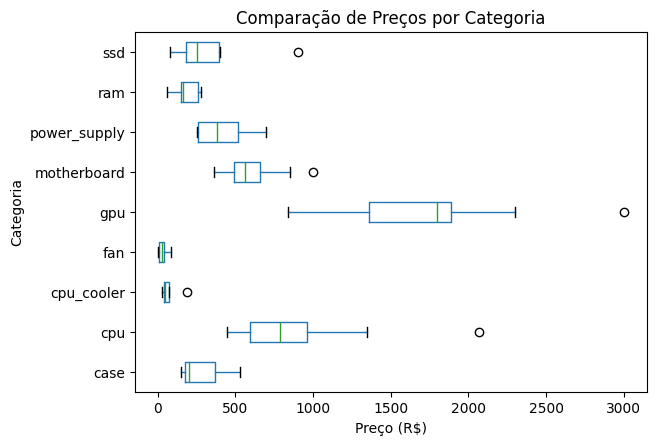

In [42]:
plt.figure(figsize=(12, 8))
df.boxplot(column='Price (R$)', by='Product type', grid=False, vert=False)
plt.title('Comparação de Preços por Categoria')
plt.xlabel('Preço (R$)')
plt.ylabel('Categoria')
plt.suptitle('')
plt.show()

### Histograma dos preços

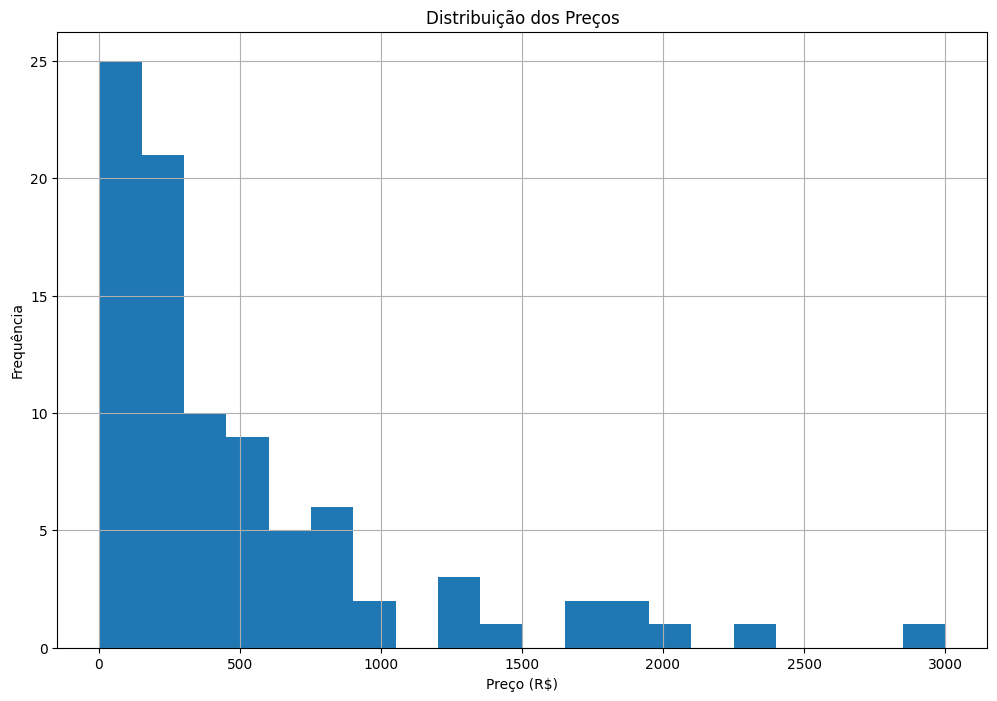

In [43]:
plt.figure(figsize=(12, 8))
df['Price (R$)'].hist(bins=20)
plt.title('Distribuição dos Preços')
plt.xlabel('Preço (R$)')
plt.ylabel('Frequência')
plt.show()

### Realizando o scraping das reviews de cada item

In [50]:
def get_product_reviews(product_url):
    response = requests.get(product_url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        script_tag = soup.find('script', type='application/ld+json')
        if script_tag:
            try:
                data = json.loads(script_tag.string)
                if 'aggregateRating' in data:
                    rating_value = data['aggregateRating']['ratingValue']
                    review_count = data['aggregateRating']['reviewCount']
                    return {"rating": float(rating_value), "num_reviews": int(review_count)}
            except json.JSONDecodeError as e:
                print(f"JSON decoding error: {e}")
        return {"rating": 0, "num_reviews": 0}
    else:
        return {"rating": 0, "num_reviews": 0}

df['Rating'] = 0
df['Num_Reviews'] = 0

for index, row in df.iterrows():
    search_query = row['Name of product'].replace(',', '').replace(' ', '-').replace('ã', '%C3%A3')
    search_url = f"https://www.kabum.com.br/busca/{search_query}"
    response = requests.get(search_url, stream=True)
    response.encoding = 'utf-8'
    soup = BeautifulSoup(response.text, 'html.parser')
    product_element = soup.find('a', class_='sc-9d1f1537-10 kueyFw productLink')
    if product_element:
        product_url = 'https://www.kabum.com.br' + product_element['href']
        reviews = get_product_reviews(product_url)
        df.at[index, 'Rating'] = reviews['rating']
        df.at[index, 'Num_Reviews'] = reviews['num_reviews']


df.to_csv('./pc_components_with_reviews.csv', index=False)

JSON decoding error: Expecting ',' delimiter: line 11 column 592 (char 849)
JSON decoding error: Expecting ',' delimiter: line 11 column 542 (char 797)


In [51]:
file_path = './pc_components_with_reviews.csv'
df_with_reviews = pd.read_csv(file_path)

### Estatísticas dos dados

In [53]:
category_stats = df.groupby('Product type')[['Price (R$)', 'Rating', 'Num_Reviews']].describe()
print(category_stats)

             Price (R$)                                                   \
                  count      mean         std     min      25%       50%   
Product type                                                               
case               10.0   268.909  130.246598  149.90   177.40   199.945   
cpu                10.0   904.517  485.287994  448.99   597.24   786.490   
cpu_cooler         10.0    66.790   46.434661   28.99    42.49    54.990   
fan                10.0    33.390   27.443680    3.99    11.49    28.990   
gpu                10.0  1751.990  599.440480  839.99  1362.49  1799.990   
motherboard        10.0   603.990  199.621865  359.99   492.49   564.990   
power_supply       10.0   414.990  168.275568  249.99   257.49   379.990   
ram                10.0   186.890   73.021230   59.99   150.74   159.990   
ssd                10.0   320.990  232.448322   79.99   182.49   254.990   

                               Rating       ...           Num_Reviews          \
      

### Gráfico de barras das avaliações por categoria

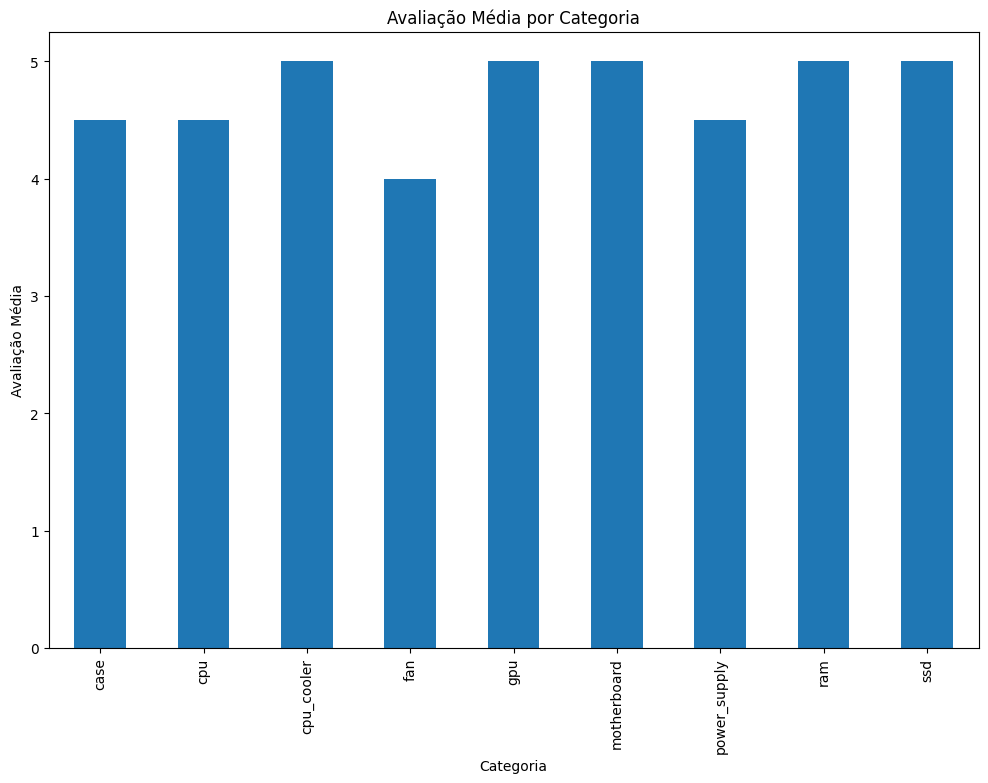

In [56]:
plt.figure(figsize=(12, 8))
df.groupby('Product type')['Rating'].mean().plot(kind='bar')
plt.title('Avaliação Média por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Avaliação Média')
plt.show()

### Escolhendo os melhores componentes com base no preço e na avaliação

In [57]:
def choose_best_components(df):
    best_components = []
    product_types = df['Product type'].unique()

    for product_type in product_types:
        subset = df[df['Product type'] == product_type]
        if not subset.empty:
            subset['Score'] = subset['Rating'] * subset['Num_Reviews']
            best_component = subset.loc[subset['Score'].idxmax()]
            best_components.append(best_component)

    return pd.DataFrame(best_components)


best_components_df = choose_best_components(df)
best_components_df.to_csv('best_components.csv', index=False)
print(best_components_df)

                                      Name of product  Product type  \
3   Placa Mãe ASRock B450M Steel Legend, AMD AM4, ...   motherboard   
19  Processador AMD Ryzen 5 5600X, 3.7GHz (4.6GHz ...           cpu   
20  Placa de Vídeo RX 6600 CLD 8G ASRock AMD Radeo...           gpu   
30  Memória RAM Kingston Fury Beast, 8GB, 3200MHz,...           ram   
43  SSD 240 GB Kingston A400, SATA, Leitura: 500MB...           ssd   
50  Fonte MSI MAG A650BN, 650W, 80 Plus Bronze, PF...  power_supply   
60  Air Cooler Rise Mode Gamer G800, RGB, AMD/Inte...    cpu_cooler   
71  Kit Com 3 Ventoinhas Rise Mode, 120mm, RGB, Pr...           fan   
80  Gabinete Gamer Rise Mode Glass 06X, Mid Tower,...          case   

    Price (R$)  Rating  Num_Reviews  Score  
3       659.99       5         1496   7480  
19      998.99       5          568   2840  
20     1349.99       5          422   2110  
30      159.99       5          360   1800  
43      169.99       5         5116  25580  
50      279.99     

/var/folders/0j/prgcs8hj5h16qrnqwb_m4x0m0000gn/T/ipykernel_60116/2726968828.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Score'] = subset['Rating'] * subset['Num_Reviews']
/var/folders/0j/prgcs8hj5h16qrnqwb_m4x0m0000gn/T/ipykernel_60116/2726968828.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Score'] = subset['Rating'] * subset['Num_Reviews']
/var/folders/0j/prgcs8hj5h16qrnqwb_m4x0m0000gn/T/ipykernel_60116/2726968828.py:8: SettingWithCopyWarning: 
A value is trying to be set on 

## Conclusão

A análise realizada no projeto abordou a problemática da escolha de componentes ideais para montagem de um PC gamer, considerando a volatilidade dos preços e a diversidade de produtos disponíveis no mercado. Utilizamos técnicas de web scraping para coletar dados de preços e avaliações dos produtos a partir do site Kabum. Em seguida, aplicamos análises estatísticas e visualizações para entender melhor a distribuição dos preços e a qualidade percebida dos componentes.

Com base nas avaliações dos usuários e no número de avaliações, desenvolvemos uma métrica de pontuação que combina a nota média e o número de reviews para selecionar os melhores componentes. Essa abordagem permitiu identificar os produtos que oferecem um bom equilíbrio entre qualidade e popularidade, refletindo tanto a satisfação do usuário quanto a confiabilidade do produto.

Os componentes selecionados são apresentados na tabela abaixo, destacando os melhores itens para cada categoria, considerando a combinação de avaliações positivas e preço acessível.

In [62]:
best_components_df = pd.read_csv('best_components.csv')
best_components_df

,Name of product,Product type,Price (R$),Rating,Num_Reviews,Score
0,"Placa Mãe ASRock B450M Steel Legend, AMD AM4, ...",motherboard,659.99,5,1496,7480
1,"Processador AMD Ryzen 5 5600X, 3.7GHz (4.6GHz ...",cpu,998.99,5,568,2840
2,Placa de Vídeo RX 6600 CLD 8G ASRock AMD Radeo...,gpu,1349.99,5,422,2110
3,"Memória RAM Kingston Fury Beast, 8GB, 3200MHz,...",ram,159.99,5,360,1800
4,"SSD 240 GB Kingston A400, SATA, Leitura: 500MB...",ssd,169.99,5,5116,25580
5,"Fonte MSI MAG A650BN, 650W, 80 Plus Bronze, PF...",power_supply,279.99,5,1303,6515
6,"Air Cooler Rise Mode Gamer G800, RGB, AMD/Inte...",cpu_cooler,72.99,5,412,2060
7,"Kit Com 3 Ventoinhas Rise Mode, 120mm, RGB, Pr...",fan,84.99,5,603,3015
8,"Gabinete Gamer Rise Mode Glass 06X, Mid Tower,...",case,149.90,5,340,1700


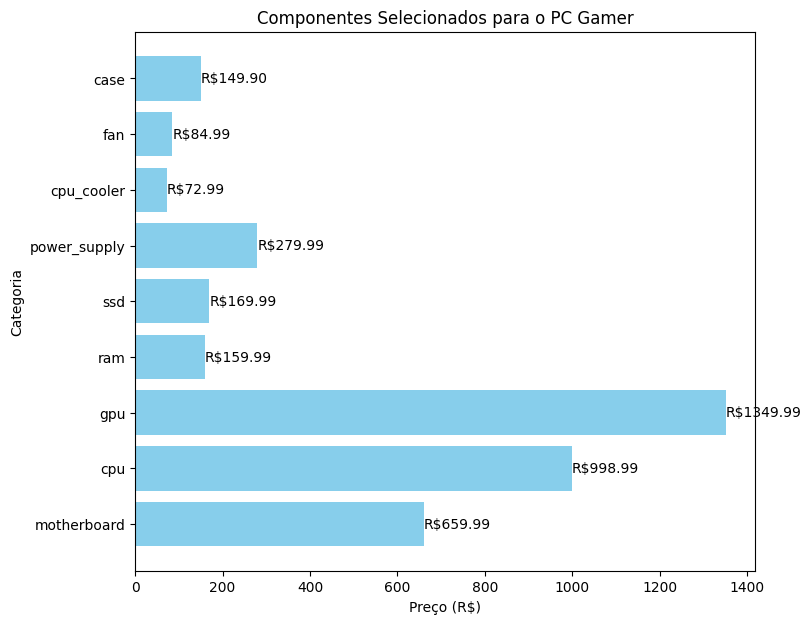

In [64]:
plt.figure(figsize=(8, 7))
plt.barh(best_components_df['Product type'], best_components_df['Price (R$)'], color='skyblue')
for index, value in enumerate(best_components_df['Price (R$)']):
    plt.text(value, index, f'R${value:.2f}', va='center')
plt.xlabel('Preço (R$)')
plt.ylabel('Categoria')
plt.title('Componentes Selecionados para o PC Gamer')
plt.show()

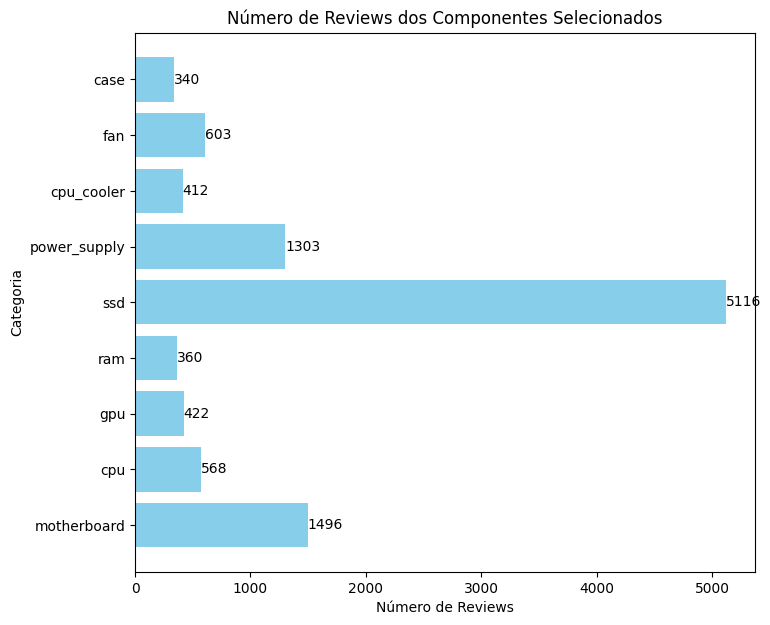

In [66]:
plt.figure(figsize=(8, 7))
plt.barh(best_components_df['Product type'], best_components_df['Num_Reviews'], color='skyblue')
for index, value in enumerate(best_components_df['Num_Reviews']):
    plt.text(value, index, f'{value}', va='center')
plt.xlabel('Número de Reviews')
plt.ylabel('Categoria')
plt.title('Número de Reviews dos Componentes Selecionados')
plt.show()

In [67]:
preco_total = best_components_df['Price (R$)'].sum()
print(f"Preço total dos componentes selecionados: R${preco_total:.2f}")

rating_medio = best_components_df['Rating'].mean()
print(f"Avaliação média dos componentes selecionados: {rating_medio:.2f}")

num_reviews_total = best_components_df['Num_Reviews'].sum()
print(f"Número total de reviews dos componentes selecionados: {num_reviews_total}")

Preço total dos componentes selecionados: R$3926.82
Avaliação média dos componentes selecionados: 5.00
Número total de reviews dos componentes selecionados: 10620


Com base nos dados acima, o preço final do PC Gamer é em torno de R$4000 reais, apresentando ótimas avaliações em cada peça. Essas análises forneceram uma solução eficiente para a seleção de componentes de PCs gamers, considerando tanto o custo-benefício quanto a qualidade percebida pelos usuários. A combinação de técnicas de web scraping, análise de dados e visualizações facilitou a identificação das melhores opções de compra, atendendo às necessidades de consumidores e profissionais da área.